In [41]:
from typing import List, Optional
from autograd import grad, jacobian, elementwise_grad
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
import math
import scipy 
from scipy import linalg
from numpy import linalg as LA
# from pyblas.level1 import dnrm2

sys.path.insert(0, os.path.join(".."))
%reload_ext autoreload
%autoreload 2

In [42]:
from lib import problems as pr
from lib import optimisers as opt
from lib import utils as ut
from lib.logistic_regression import LogisticRegression

In [43]:
plt.rcParams['figure.figsize'] = 15, 8
# plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18

In [44]:
nx=10
ny=10
problem = LogisticRegression.with_parameters(nx=nx, ny=ny, L_x_mu_x=20, L_xy=1.1, mu_xy=1)

In [45]:
print(problem.L_xy, problem.mu_xy)

1.1 0.9999999999999999


In [46]:
print(problem.loss(np.ones(nx), -np.ones(ny)))
print(problem.xopt)
print(problem.yopt)

3.1629818367880667
[ 0.022268    0.05475666 -0.01515061 -0.02100395  0.00845752 -0.03131496
 -0.00978896 -0.00226356 -0.00351709 -0.00200292]
[ 0.44008545 -0.43481982  0.44056837 -0.44077952  0.4388994   0.43909939
  0.44178482 -0.43841194  0.44413373  0.43755404]


In [47]:
params = {"apdg": None,
          'lpd': None,
          'altgd': None,
          'simgd': None,
          # 'avg': None,
          'eg': None,
          'omd': None,
          'AA': None
         }

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
iteration = 2000
methods_dict = ut.main(problem, iteration, x0.copy(), y0.copy(), params, eps=1e-6)

EG:  48%|███████████████████████████████████▋                                      | 963/2000 [00:02<00:02, 393.10it/s]
C:\Users\Georgy\anaconda3\envs\pytorch_env\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
LPD:  14%|██████████▍                                                              | 287/2000 [00:00<00:02, 575.87it/s]


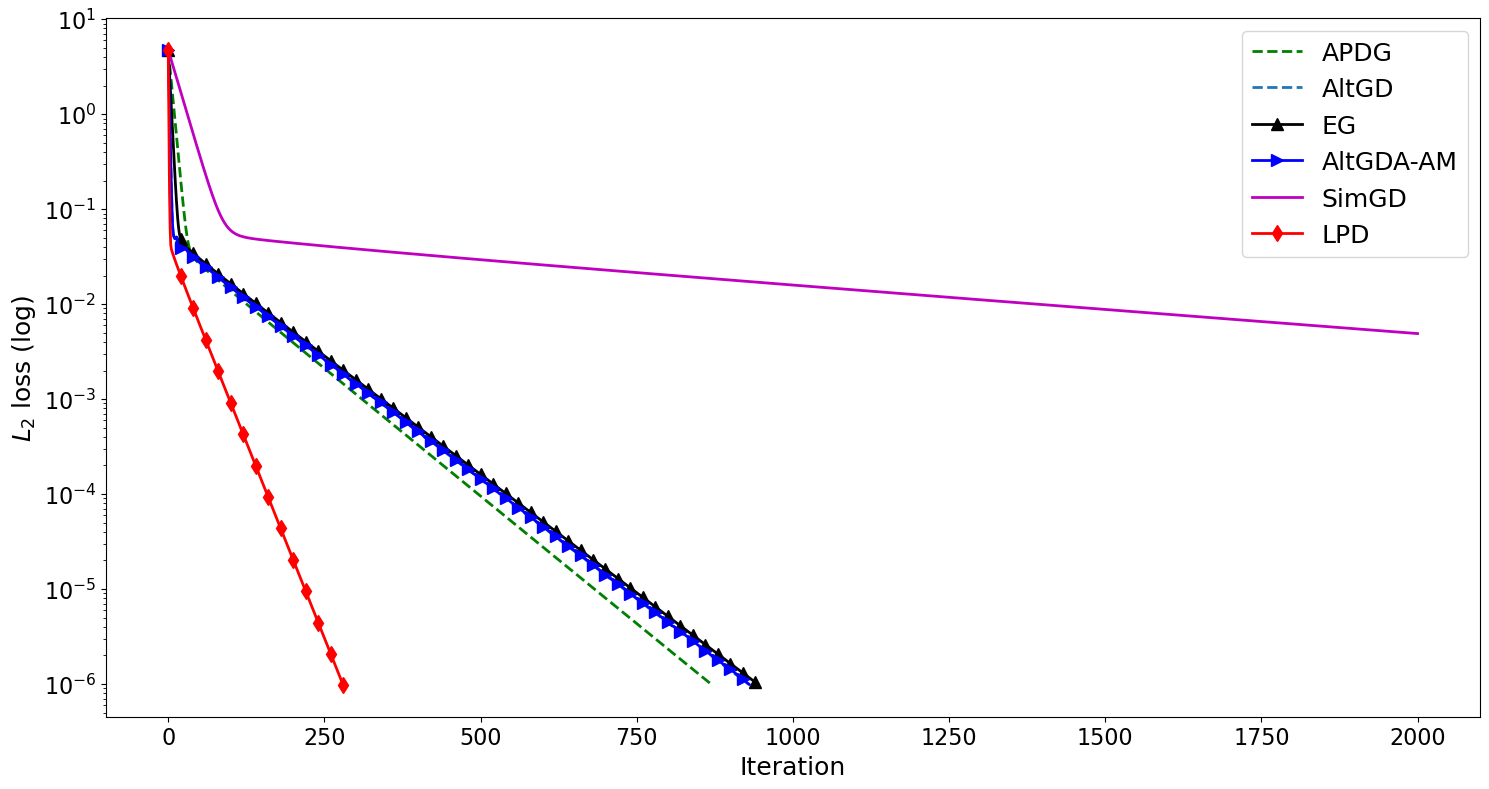

In [39]:
%matplotlib inline
plot_interval = 1
markevery= 20
for method in methods_dict:
    if method not in ["OMD"]:
        plt.semilogy(np.arange(0, len(methods_dict[method]["loss_hist"])+plot_interval-1, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.xlabel("Iteration")
plt.ylabel(r"$L_2$ loss (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Logistic_loss_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Logistic_loss_iter{iteration}_nx{nx}_ny{ny}.pdf"))

In [40]:
print(methods_dict["LPD"]["y_hist"][-1])

[ 0.44274202 -0.44322859 -0.44109983  0.437602    0.44030943  0.44052907
 -0.44168764 -0.44112217 -0.43609465 -0.44058572]


**OMD didn't converge**